# Importing libraries and dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # used for the legend at step duration
import seaborn as sns
import numpy as np
import datetime

from functions import cleaning 

In [6]:
# Disabling a specific type of warning from Jupyter, that I know if mistaken for something else
pd.options.mode.chained_assignment = None 

In [7]:
filepath1 = '../Data/df_final_demo.txt' # Client Profiles
filepath2 = '../Data/df_final_web_data_pt_1.txt' # Digital Footprints, part 1
filepath3 = '../Data/df_final_web_data_pt_2.txt' # Digital Footprints, part 2
filepath4 = '../Data/df_final_experiment_clients.txt' # Experiment Roster 

# Loading datasets
df_clients = pd.read_csv(filepath1)
df2 = pd.read_csv(filepath2)
df3 = pd.read_csv(filepath3)
df_roster = pd.read_csv(filepath4)

# Merging part 1 and 2 of Digital Footprints
df_trace = pd.concat([df2, df3], axis=0, ignore_index=True)

In [8]:
# Data cleaning

# Calling the cleaning function I created at the functions.py file
df_clients, df_trace, df_roster, _ = cleaning(df_clients, df_trace, df_roster)

# Duration of experiment and data collection

In [11]:
print(df_trace.date_time.max())
print(df_trace.date_time.min())

2017-06-20 23:59:57
2017-03-15 00:03:03


In [16]:
df_trace.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [24]:
# seperating the test and control group
# First separating the datasets for the test and control group
df_roster_test = df_roster[df_roster.variation == 'Test']
df_roster_control = df_roster[df_roster.variation == 'Control']

df_test = df_trace[df_trace.client_id.isin(df_roster_test.client_id.unique().tolist())]
df_control = df_trace[df_trace.client_id.isin(df_roster_control.client_id.unique().tolist())]

In [15]:
# checking that date_time is in datetime format
df_trace.info()

<class 'pandas.core.frame.DataFrame'>
Index: 744641 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   client_id     744641 non-null  object        
 1   visitor_id    744641 non-null  object        
 2   visit_id      744641 non-null  object        
 3   process_step  744641 non-null  object        
 4   date_time     744641 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 34.1+ MB


In [26]:
df_test['date_time'] = pd.to_datetime(df_test['date_time']).dt.normalize()
df_control['date_time'] = pd.to_datetime(df_control['date_time']).dt.normalize()

In [28]:
# Here for simplicity for the scope of the exercise, 
# I will use the visit_id to see the visits over the experiment time
daily_visit_test = df_test.groupby('date_time')['visit_id'].nunique()
daily_visit_control = df_control.groupby('date_time')['visit_id'].nunique()

In [ ]:
custom_palette = {'Test': '#FFD700', 'Control': '#FF5200'}

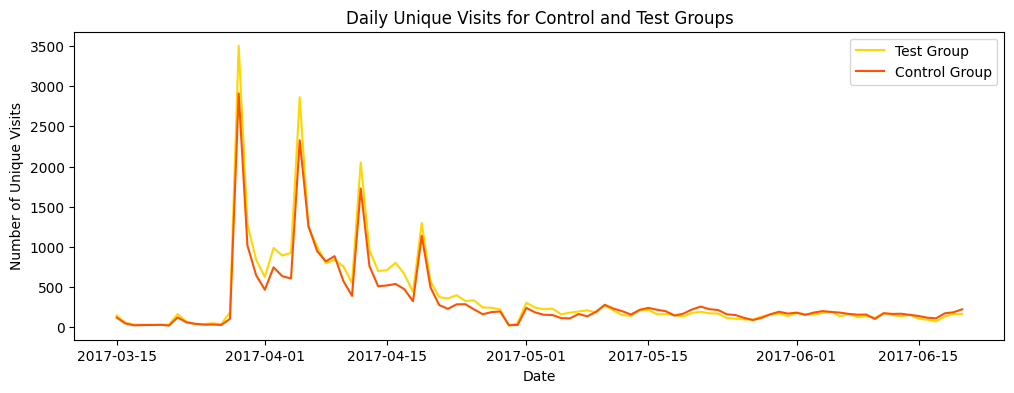

In [43]:
# Set up the plot
plt.figure(figsize=(12, 4))

# Plot the test group data
plt.plot(daily_visit_test.index, daily_visit_test, label='Test Group', color='#FFD700')

# Plot the control group data
plt.plot(daily_visit_control.index, daily_visit_control, label='Control Group',color='#FF5200')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Number of Unique Visits')
plt.title('Daily Unique Visits for Control and Test Groups')
plt.legend()


plt.show()